In [2]:
 X = [[0], [3], [1]]
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(X)
NearestNeighbors(n_neighbors=2)
A = neigh.kneighbors_graph(X)
A.toarray()

array([[1., 0., 1.],
       [0., 1., 1.],
       [1., 0., 1.]])

In [2]:
from matplotlib.colors import ListedColormap



def knn_comparison(data, n_neighbors = 15):
    '''
    This function finds k-NN and plots the data.
    '''
    X = data[:, :2]
    y = data[:,2] 
    
    
    # grid cell size
    h = .02
    cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])


    # the core classifier: k-NN
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # we create a mesh grid (x_min,y_min) to (x_max y_max) with 0.02 grid spaces
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # we predict the value (either 0 or 1) of each element in the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # xx.ravel() will give a flatten array

    # np.c_ : Translates slice objects to concatenation along the second axis.
    # > np.c_[np.array([1,2,3]), np.array([4,5,6])]
    # > array([[1, 4],
    #          [2, 5],
    #          [3, 6]])   (source: np.c_ documentation)
    
    
    
    
    # convert the out back to the xx shape (we need it to plot the decission boundry)
    Z = Z.reshape(xx.shape)
    
    
    # pcolormesh will plot the (xx,yy) grid with colors according to the values of Z
    # it looks like decision boundry
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
   
    # scatter plot of with given points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    
    #defining scale on both axises
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
   
    # set the title
    plt.title('K value = '+str(n_neighbors))
    

    plt.show()

# 1 .CROSS VALIDATION

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

# STEP 1 : Data Prepocessing :

In [11]:
names = ['x','y','class']
df = pd.read_csv('./demo_data/3.concertriccir2.csv',header = None,names = names)
print(df.head(5))

          x         y  class
0  0.700335 -0.247068    0.0
1 -3.950019  2.740080    1.0
2  0.150222 -2.157638    1.0
3 -1.672050 -0.941519    1.0
4  2.560483 -1.846577    1.0


In [19]:
df.shape

(500, 3)

In [39]:
x = np.array(df.iloc[:,0:2])

In [40]:
x.shape

(500, 2)

In [44]:
y = np.array(df['class'])

In [45]:
y.shape

(500,)

# STEP 2 : Simple Cross Validation : 

In [47]:
x_1,x_test,y_1,y_test = model_selection.train_test_split(x,y,test_size = 0.3,random_state=0)
x_tr,x_cv,y_tr,y_cv = model_selection.train_test_split(x_1,y_1,test_size = 0.3,random_state=0)


In [52]:
for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_tr,y_tr)
    pred = knn.predict(x_cv)
    acc = accuracy_score(y_cv,pred,normalize=True)*float(100)
    print("CV accuracy for k= %d is %d%%" %(i,acc))
   

CV accuracy for k= 1 is 90%
CV accuracy for k= 3 is 84%
CV accuracy for k= 5 is 87%
CV accuracy for k= 7 is 87%
CV accuracy for k= 9 is 81%
CV accuracy for k= 11 is 83%
CV accuracy for k= 13 is 81%
CV accuracy for k= 15 is 80%
CV accuracy for k= 17 is 79%
CV accuracy for k= 19 is 72%
CV accuracy for k= 21 is 73%
CV accuracy for k= 23 is 72%
CV accuracy for k= 25 is 67%
CV accuracy for k= 27 is 65%
CV accuracy for k= 29 is 64%


In [54]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_tr,y_tr)
pred = knn.predict(x_test)
acc = accuracy_score(y_test,pred,normalize = True)*float(100)
print(" Test accuracy for k = 1 is %d%%" %(acc))

 Test accuracy for k = 1 is 90%


# 10 Fold cross Validation : 

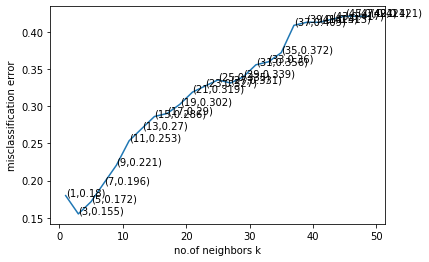

TypeError: 'str' object is not callable

In [89]:
myList = list(range(0,50))
neighbors = list(filter(lambda x : x%2!=0,myList))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,x_tr,y_tr,cv=3,scoring='accuracy')
    cv_scores.append(scores.mean())
MSE = [1 - x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print = ('the optimalnumber of neighbors is %d.' %optimal_k)
plt.plot(neighbors,MSE)
for xy in zip(neighbors,np.round(MSE,3)):
    plt.annotate('(%s,%s)' %xy , xy=xy,textcoords='data')
plt.xlabel('no.of neighbors k')
plt.ylabel('misclassification error')
plt.show()
print("The misclassification error for each k value is:",np.round(MSE,3))

In [93]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_tr, y_tr, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

TypeError: 'str' object is not callable